In [1]:
import zipfile
import os
zppath="/content/drive/MyDrive/data1a.zip"

with zipfile.ZipFile(zppath,'r') as zpfile:
    
    zpfile.extractall()

In [ ]:
# import shutil
# shutil.rmtree("/content/data1a")

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = '/content/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [7]:
from tensorflow.keras import Model 
from tensorflow.keras.applications import ResNet50   

base_model = ResNet50(input_shape = (224, 224, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/10
92/92 - 66s - loss: 4.2703 - Accuracy: 0.6625 - precision: 0.6728 - recall: 0.6326 - val_loss: 86.7844 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 66s/epoch - 721ms/step
Epoch 2/10
92/92 - 26s - loss: 0.7789 - Accuracy: 0.6576 - precision: 0.6840 - recall: 0.5859 - val_loss: 19.0501 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 26s/epoch - 283ms/step
Epoch 3/10
92/92 - 24s - loss: 0.6519 - Accuracy: 0.7201 - precision: 0.7330 - recall: 0.6924 - val_loss: 50.4538 - val_Accuracy: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 24s/epoch - 256ms/step
Epoch 4/10
92/92 - 26s - loss: 0.6011 - Accuracy: 0.7397 - precision: 0.7549 - recall: 0.7098 - val_loss: 6.7461 - val_Accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - 26s/epoch - 286ms/step
Epoch 5/10
92/92 - 25s - loss: 0.5021 - Accuracy: 0.7859 - precision: 0.8044 - recall: 0.7554 - val_loss: 0.6624 - val_Accuracy: 0.6413 - val_precision: 0.6923 - val

In [8]:
model.save("classifier.h5")

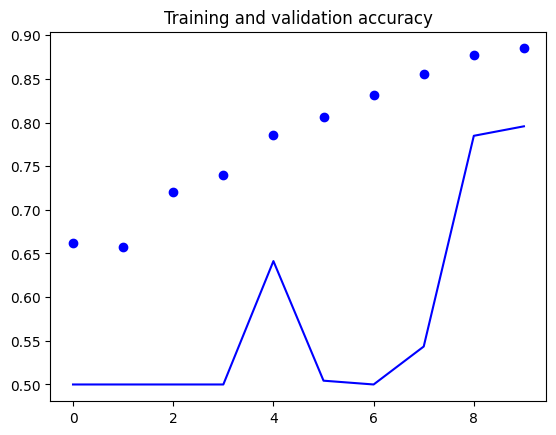

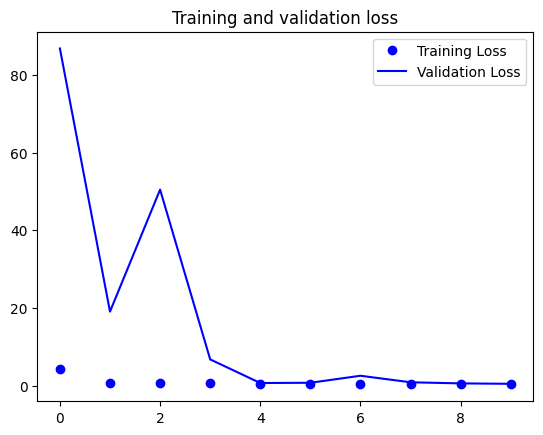

In [9]:
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
import cv2

1/1 [==============================] - 0s 40ms/step
[[1.]]
The car is damaged


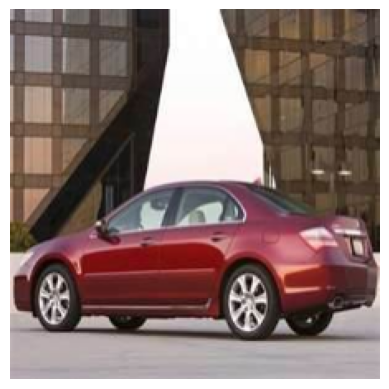

In [15]:
im = cv2.imread("/content/data1a/validation/01-whole/0001.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (224, 224)) 
imS=im.reshape([1,224,224,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)